In [1]:
import pandas as pd 
import numpy as np 
import matplotlib 
import matplotlib.pyplot as plt 

<h4> Importing Libraries </h4>

In [2]:
#Reading the dataset - Just making sure there are no unexpected errors here
df = pd.read_csv(r'C:\Users\yaoz\Desktop\dataeng_test\Section_5_Machine_Learning\data\car.data',header = None,names = ['buying_price', 'maintenance_price','no_of_doors','no_of_person','lug_boot','safety','decision']) 
df

,buying_price,maintenance_price,no_of_doors,no_of_person,lug_boot,safety,decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


<h4> Initial EDA - Explaratory Data Analysis: Here i just want to see the size and variables of the data and also to check there are no missing fields </h4>

Inference
So, we have 1728 datapoints with 6 columns (features) and 1 class label(target) column.
Data set contains categorical features.
There are no missing value in the dataset.

In [3]:
#lets explore the given dataset
print(df.shape)

print('\n',df.info())

#checking for any missing value in the given dataset
print('\n',df.isnull().sum())

(1728, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   buying_price       1728 non-null   object
 1   maintenance_price  1728 non-null   object
 2   no_of_doors        1728 non-null   object
 3   no_of_person       1728 non-null   object
 4   lug_boot           1728 non-null   object
 5   safety             1728 non-null   object
 6   decision           1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB

 None

 buying_price         0
maintenance_price    0
no_of_doors          0
no_of_person         0
lug_boot             0
safety               0
decision             0
dtype: int64


In [4]:
df.buying_price.value_counts()


med      432
high     432
vhigh    432
low      432
Name: buying_price, dtype: int64

Lets explore all the given features and especially the target variable and see whether there is any CLASS IMBALANCE or not. This is an important step as class imbalance can turn the decision in favour of dominant class label and thus can hamper the results of our predictions

To remove data imbalance we can either UPSAMPLE (in case when datapoints belonging to a particular class label are very low) or DOWNSAMPLE (where number of data points belonging to a particular class label are very large in number).Each has its own advantages and disadvantages. Another way to remove any decision biasness in the prediction is the use of appropriate evaluation metrices

In [5]:
#Segregating datasets into features and target datasets 

#dropping first column(target label) and selecting rest, dropping no_of_person as well as this is not a factor in our final model
X=df.drop(['buying_price','no_of_person'],axis=1)

#selecting only target variable
Y=df['buying_price']

print(X.shape,Y.shape)

(1728, 5) (1728,)


Feature engineering
As the dataset has categorical features and hence they needs to be encoded in the appropriate form. There are two main method of encodig:

One hot encoding
Label encoding
As we have categorial features that are ordinal in nature i.e that can be ranked (ordered) hence label encoding will solve our purpose.Had there been nominal features we could have preferred one hot encoding.

In [6]:
# importing necessary package for encoding our categorial features
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=['maintenance_price','no_of_doors','lug_boot','safety','decision'])
x= encoder.fit_transform(X)

print(x.head())
print(x.shape)

   maintenance_price  no_of_doors  lug_boot  safety  decision
0                  1            1         1       1         1
1                  1            1         1       2         1
2                  1            1         1       3         1
3                  1            1         2       1         1
4                  1            1         2       2         1
(1728, 5)


In [7]:
print('Original dataset')
print('\n\n',X.head())
print('\n Encoded dataset')
print('\n',x.head())

Original dataset


   maintenance_price no_of_doors lug_boot safety decision
0             vhigh           2    small    low    unacc
1             vhigh           2    small    med    unacc
2             vhigh           2    small   high    unacc
3             vhigh           2      med    low    unacc
4             vhigh           2      med    med    unacc

 Encoded dataset

    maintenance_price  no_of_doors  lug_boot  safety  decision
0                  1            1         1       1         1
1                  1            1         1       2         1
2                  1            1         1       3         1
3                  1            1         2       1         1
4                  1            1         2       2         1


Just see the "safety" column in both the datasets for comparision LOW in original data set is encoded as 1, MED as 2 and High as 3

HIGH>MED>LOW similarly 3>2>1 i.e order of the categorical features are entact, similarly we can check for other columns

Lets break the dataset into 3 parts Train,Crossvalidation and Test datasets. One can simply split the dataset into train and test data sets only but splitting into two is prone to data leakage. So, the idea behined splitting the data sets into three parts is to avoid data leakage and to make our test data totally unseen from the model.This brings more generlization to our model accuracy.

In [8]:
#importing necessary packages and modules
from sklearn.model_selection import train_test_split

x_1,xtest,y_1,ytest=train_test_split(x,Y,test_size=0.3,random_state=2)

xtrain,x_cv,ytrain,y_cv=train_test_split(x_1,y_1,test_size=0.3,random_state=2)


# Exploring class distribution under train ,crossvalidation and test dataset
print('Training Dataset',xtrain.shape,ytrain.shape)
print('\n Class label distribution in Training Set\n',ytrain.value_counts())
print('\n***********')
print("\n CrossValidation Dataset",x_cv.shape,y_cv.shape)
print('\nClass label distribution in Cross Validation Set\n',y_cv.value_counts())
print('\n***********')
print("\n Test Dataset",xtest.shape,ytest.shape)
print('\nClass label distribution in Test Set\n',ytest.value_counts())

Training Dataset (846, 5) (846,)

 Class label distribution in Training Set
 high     223
vhigh    216
low      204
med      203
Name: buying_price, dtype: int64

***********

 CrossValidation Dataset (363, 5) (363,)

Class label distribution in Cross Validation Set
 med      106
vhigh     88
low       88
high      81
Name: buying_price, dtype: int64

***********

 Test Dataset (519, 5) (519,)

Class label distribution in Test Set
 low      140
vhigh    128
high     128
med      123
Name: buying_price, dtype: int64


In [9]:
# importing necessary packages
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree

USING GRID SEARCH FOR FINDING THE BEST PARAMETERS FOR OUR DECISION TREE MODEL & checking for model classification accuracy on Cross Validation Dataset

In [10]:
from sklearn.model_selection import GridSearchCV

parameters={'max_depth': list(range(1,30)),
            'min_samples_leaf' : list(range(5,200,20)),
            'min_samples_split': list(range(5,200,20))
            }
model=GridSearchCV(DecisionTreeClassifier(class_weight='balanced'),parameters,n_jobs=-1,cv=10,scoring='accuracy')
model.fit(xtrain,ytrain)
print(model.best_estimator_)
print("\n",model.best_params_)
print("\n",model.score(x_cv,y_cv))

ypredict=model.predict(x_cv)
accuracy=accuracy_score(y_cv,ypredict,normalize=True)*float(100)
print('\n\n classification report')
print(classification_report(y_cv,ypredict))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=45, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

 {'max_depth': 5, 'min_samples_leaf': 45, 'min_samples_split': 5}

 0.31955922865013775


 classification report
              precision    recall  f1-score   support

        high       0.30      0.20      0.24        81
         low       0.45      0.19      0.27        88
         med       0.36      0.39      0.37       106
       vhigh       0.27      0.48      0.34        88

    accuracy                           0.32       363
   macro avg       0.34      0.31      0.31       363
weighted avg       0.34      0.32      0.31       363



Testing model accuracy on Unseen Data (Test Dataset)
Using optimal value of hyper parameters that we got via Grid search, predicting the class labels for the trest dataset and getting its classification report 

In [11]:
clf=tree.DecisionTreeClassifier(class_weight='balanced',max_depth=9,min_samples_leaf=5,min_samples_split=5)
clf.fit(xtrain,ytrain)
ypredict=clf.predict(xtest)
accuracy=accuracy_score(ytest,ypredict,normalize=True)*float(100)
print('\n Accuracy score is',accuracy)
print('\n classification report')
print(classification_report(ytest,ypredict))



 Accuracy score is 22.54335260115607

 classification report
              precision    recall  f1-score   support

        high       0.12      0.09      0.10       128
         low       0.27      0.22      0.24       140
         med       0.19      0.23      0.21       123
       vhigh       0.28      0.37      0.32       128

    accuracy                           0.23       519
   macro avg       0.22      0.23      0.22       519
weighted avg       0.22      0.23      0.22       519



Inference drawn from Accuracy score and clasification report
Accuracy Score
Model Accuracy on Training dataset= 90% , Model Accuracy on Test Dataset=92%

Thus the present model has shown consistant results on both Training and Test Datasets and hence can be considered as a generalised model.

Classification Report
It is advisable to not just rely on accuracy score as accuracy score sometimes doesnot tell the true picture related to the model, especially in the case of imbalanced dataset. Classification Report is an efective metric that makes us doubly sure regarding the performance of our model.

Inference from classification report : As we can see that the diagonal elements of confusion martix have the maximum value for both Train and Test data set, it can therefore be concluded that the model has shown appreciable results. F1 score for each class label also tells the same story except for class label "good" in training dataset for which F1 score is very low(43% only). One reason could be its very less presence in the crossvalidation dataset on which the training accuracy was measured.

[Text(707.1385732323233, 860.7, 'safety <= 2.5\ngini = 0.75\nsamples = 846\nvalue = [211.5, 211.5, 211.5, 211.5]\nclass = low'),
 Text(531.2468434343434, 770.1, 'safety <= 1.5\ngini = 0.747\nsamples = 770\nvalue = [211.5, 159.662, 184.411, 211.5]\nclass = low'),
 Text(332.50631313131316, 679.5, 'lug_boot <= 1.5\ngini = 0.743\nsamples = 585\nvalue = [152.697, 118.191, 130.234, 181.146]\nclass =  vhigh'),
 Text(151.47727272727275, 588.9000000000001, 'no_of_person <= 1.5\ngini = 0.749\nsamples = 284\nvalue = [63.545, 71.537, 71.889, 77.354]\nclass =  vhigh'),
 Text(64.1919191919192, 498.3, 'maintenance_price <= 3.5\ngini = 0.737\nsamples = 88\nvalue = [18.02, 18.662, 20.837, 30.354]\nclass =  vhigh'),
 Text(46.96969696969697, 407.70000000000005, 'no_of_doors <= 3.5\ngini = 0.729\nsamples = 61\nvalue = [14.226, 11.404, 12.502, 22.521]\nclass =  vhigh'),
 Text(31.313131313131315, 317.1, 'maintenance_price <= 2.5\ngini = 0.728\nsamples = 47\nvalue = [9.484, 9.331, 10.419, 17.625]\nclass =  v

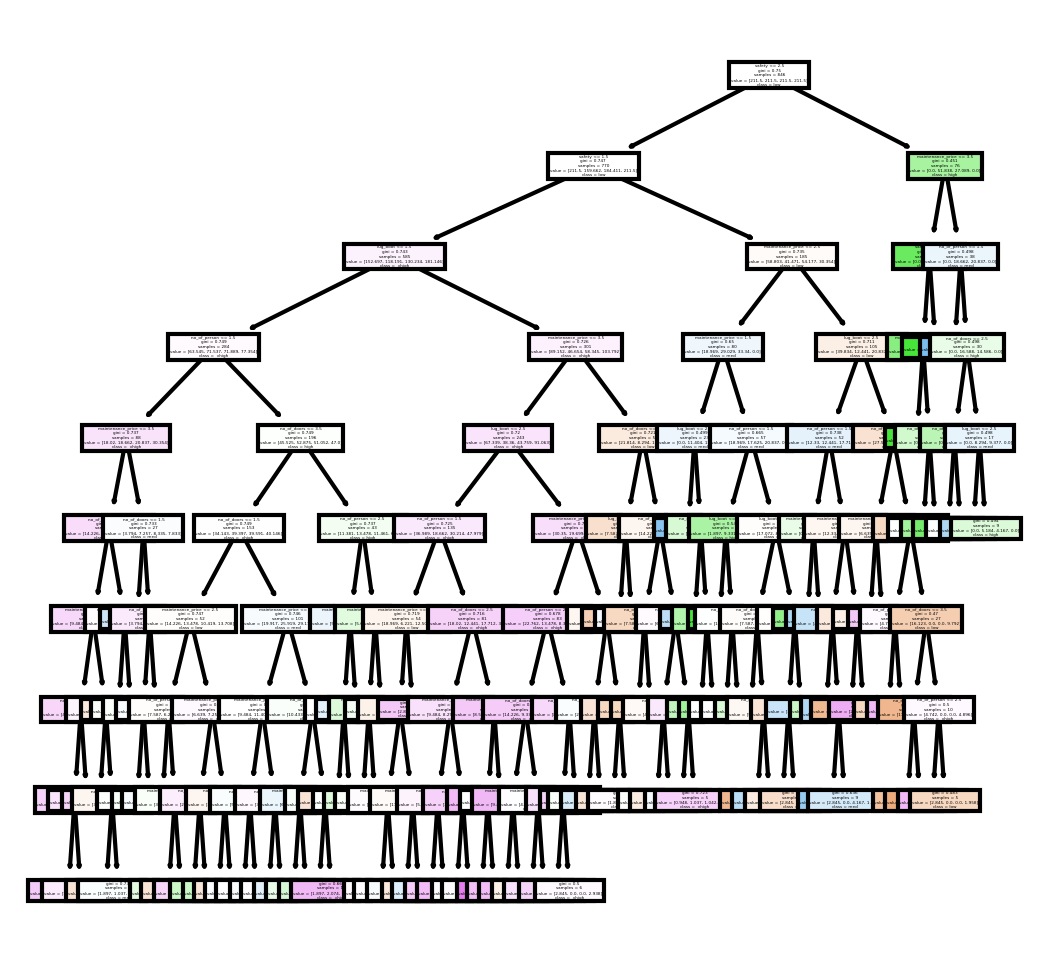

In [12]:
# Visualising Decision Tree
cols=['maintenance_price','no_of_doors','no_of_person','lug_boot','safety','decision']
trgt=['low','high','med',' vhigh']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,feature_names = cols, class_names=trgt,filled = True)

<h3> Prediction - This Model was trained on Buying_price as target variablee: Now lets test on the filtered sample specifications! </h3>

In [15]:
filter = df['maintenance_price'] == 'high'
filter1 = df['no_of_doors'] == '4'
filter2 = df['lug_boot'] == 'big'
filter3= df['safety'] == 'high'
filter4 = df['decision'] == 'good'
filter5 = df['decision'] == 'vgood'


#We must exclude the last feature as the last variable is a missing factor 

filtereddata = df.where(filter& filter1 & filter2&filter3&filter5) 
filtereddata.dropna(inplace = True)

filterencoder = ce.OrdinalEncoder(cols = ['buying_price','maintenance_price','no_of_doors','no_of_person','lug_boot','safety','decision'])
unseen = filterencoder.fit_transform(filtereddata)

print(filtereddata['buying_price'])

1475    low
1484    low
Name: buying_price, dtype: object


In [16]:
unseen.drop(['buying_price','no_of_doors'],axis =1,inplace=True)

print(clf.predict(unseen))

['vhigh' 'vhigh']


<h3> Conclusion: This model was not trained very well as the model predicted a buying price of med and vhigh when the correct labels were both low , when given the same input as well. This can be observed in the low accuracy as well from the earlier analysis. </h3>